In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df=pd.read_csv('D:\Gandhi\Machine Learning\Datasets\height_weight\weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


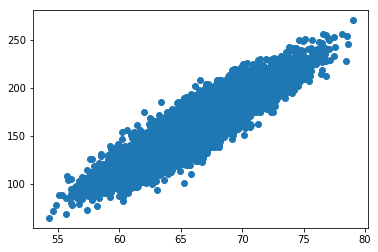

In [6]:
plt.scatter(df.Height,df.Weight)

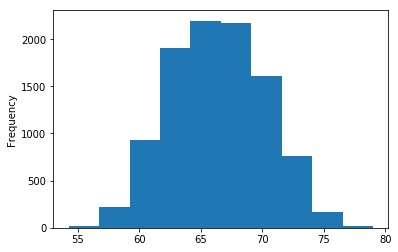

In [11]:
df.Height.plot(kind='hist')

In [16]:
x=df['Height']
y=df['Weight']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [25]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [26]:
reg.fit([x_train],[y_train])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
reg.predict([x_test])

array([[176.04864414, 147.9931653 , 201.65505594, ..., 135.60156835,
        183.38377218, 114.76688164]])

In [34]:
X = df.iloc[:, 1:2].values
Y = df.iloc[:, 2:3].values

In [35]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [36]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [37]:
Y

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5)

In [39]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [41]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
Y_pred=reg.predict(X_test)

In [44]:
reg.score(X_test,Y_test)

0.856193380662864

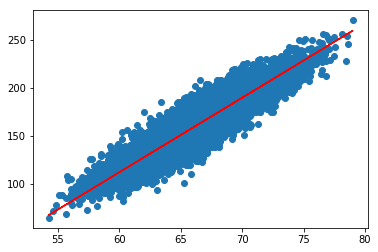

In [47]:
plt.scatter(df['Height'],df['Weight'])
plt.plot(df[['Height']],reg.predict(df[['Height']]),color='red')

In [48]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.856193380662864

In [49]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [55]:
a=df.drop(['Gender'],axis='columns')

In [56]:
b=df.Gender

In [69]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2)

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
b=le.fit_transform(b)

In [68]:
b

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [71]:
knn.fit(a_train,b_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [73]:
b_pred=knn.predict(a_test)

In [74]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(b_pred,b_test)
cm

array([[893, 100],
       [114, 893]], dtype=int64)

In [75]:
a.shape

(10000, 2)

In [76]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(a_train,b_train)
b_predict=knn.predict(a_test)
confusion_matrix(b_predict,b_test)

array([[906,  84],
       [101, 909]], dtype=int64)